# **Intro to Financial Engineering (MAL 4330) - Project Assignment**

## Group Members -

*B20AI060, Riyanshu Jain*

*B20AI055, Priyank Mandal*

*B20CI032, Priyanshu Jain*

Install the package using the code below. Without this library the data will not be imported.

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Load Packages
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

# !pip install PyPortfolioOpt

### Pick any 10 risky assets from the market. Use their 3 months closing price to obtain simple returns.

In [3]:
# Import data
df = yf.download(['AAPL', 'AMD', 'GOOGL', 'AMZN', 'MSFT', 'NVDA', 'TSLA', 'SONY', 'META', 'NFLX'], start='2019-10-01', end='2019-12-31')
df = df['Close']
df

[*********************100%***********************]  10 of 10 completed


,AAPL,AMD,AMZN,GOOGL,META,MSFT,NFLX,NVDA,SONY,TSLA
Date,,,,,,,,,,
2019-10-01,56.147499,28.760000,86.782501,60.299999,175.809998,137.070007,269.579987,43.500000,57.959999,16.312668
2019-10-02,54.740002,28.309999,85.661499,58.896000,174.600006,134.649994,268.029999,43.259998,56.830002,16.208668
2019-10-03,55.205002,28.680000,86.221001,59.471500,179.380005,136.279999,268.149994,45.327499,57.930000,15.535333
2019-10-04,56.752499,29.010000,86.982498,60.548000,180.449997,138.119995,272.790009,45.492500,58.750000,15.428667
2019-10-07,56.764999,28.930000,86.633003,60.412498,179.679993,137.119995,274.459991,46.082500,58.070000,15.848000
...,...,...,...,...,...,...,...,...,...,...
2019-12-23,71.000000,45.459999,89.650002,67.531502,206.179993,157.410004,333.100006,59.705002,68.080002,27.948000
2019-12-24,71.067497,46.540001,89.460503,67.221497,205.119995,157.380005,333.200012,59.654999,67.760002,28.350000
2019-12-26,72.477501,46.630001,93.438499,68.123497,207.789993,158.669998,332.630005,59.797501,68.019997,28.729334


Simple returns (calculating percentage change) using 3 months closing price

In [4]:
returns = df.pct_change()
returns = returns.dropna()
returns

,AAPL,AMD,AMZN,GOOGL,META,MSFT,NFLX,NVDA,SONY,TSLA
Date,,,,,,,,,,
2019-10-02,-0.025068,-0.015647,-0.012917,-0.023284,-0.006882,-0.017655,-0.005750,-0.005517,-0.019496,-0.006375
2019-10-03,0.008495,0.013070,0.006532,0.009771,0.027377,0.012105,0.000448,0.047792,0.019356,-0.041542
2019-10-04,0.028032,0.011506,0.008832,0.018101,0.005965,0.013502,0.017304,0.003640,0.014155,-0.006866
2019-10-07,0.000220,-0.002758,-0.004018,-0.002238,-0.004267,-0.007240,0.006122,0.012969,-0.011574,0.027179
2019-10-08,-0.011715,-0.024196,-0.015670,-0.014997,-0.010741,-0.010575,-0.013627,-0.038518,-0.014810,0.009801
...,...,...,...,...,...,...,...,...,...,...
2019-12-23,0.016318,0.029672,0.003638,-0.000437,-0.000582,0.000000,-0.011279,-0.002298,0.002651,0.033605
2019-12-24,0.000951,0.023757,-0.002114,-0.004591,-0.005141,-0.000191,0.000300,-0.000838,-0.004700,0.014384
2019-12-26,0.019840,0.001934,0.044467,0.013418,0.013017,0.008197,-0.001711,0.002389,0.003837,0.013380


In [5]:
mean_returns = returns.mean()
cov_matrix = returns.cov()
print("Mean of simple returns:")
print(mean_returns)

Mean of simple returns:
AAPL     0.004280
AMD      0.007640
AMZN     0.001053
GOOGL    0.001740
META     0.002518
MSFT     0.002290
NFLX     0.003115
NVDA     0.004847
SONY     0.002561
TSLA     0.009015
dtype: float64


Risk free asset not included here

In [6]:
np.random.seed(42)
num_ports = 10000
all_weights = np.zeros((num_ports, 10))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

In [7]:
for x in range(num_ports):
    # Weights
    weights = np.array(np.random.random(10))
    weights = weights/np.sum(weights)
    
    # Save weights
    all_weights[x,:] = weights
    
    # Expected return
    ret_arr[x] = np.sum((mean_returns * weights * len(returns)))
    
    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * len(returns), weights)))
    
    # Sharpe Ratio without rf asset
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]

print("Max sharpe ratio in the array: ", sharpe_arr.max())
index = sharpe_arr.argmax()
cnt = 0
for i in ('AAPL', 'AMD', 'AMZN', 'GOOGL', 'META', 'MSFT', 'NFLX', 'NVDA', 'SONY', 'TSLA'):
    print("Assigned weight to", i, ": ", round(all_weights[index,:][cnt], 3))
    cnt += 1
print("Sum of weights: ", sum(all_weights[index,:]))

Max sharpe ratio in the array:  3.813055250329695
Assigned weight to AAPL :  0.222
Assigned weight to AMD :  0.156
Assigned weight to AMZN :  0.036
Assigned weight to GOOGL :  0.003
Assigned weight to META :  0.038
Assigned weight to MSFT :  0.187
Assigned weight to NFLX :  0.005
Assigned weight to NVDA :  0.052
Assigned weight to SONY :  0.169
Assigned weight to TSLA :  0.131
Sum of weights:  1.0


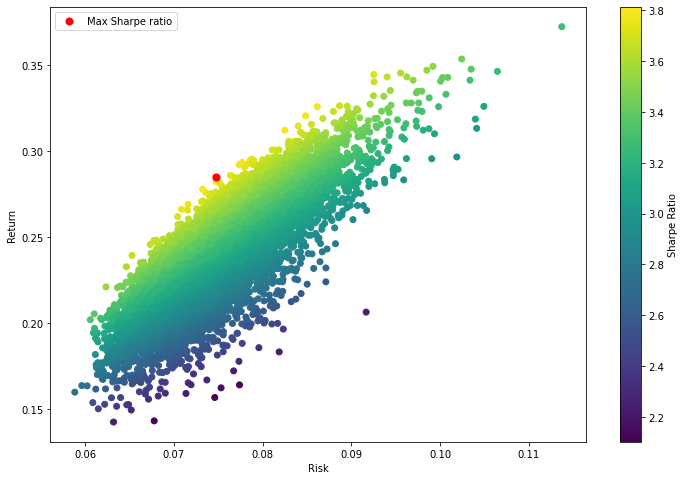

In [8]:
max_sr_ret = ret_arr[index]
max_sr_vol = vol_arr[index]
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Risk')
plt.ylabel('Return')
plt.scatter(max_sr_vol, max_sr_ret,c='red', s=50, label='Max Sharpe ratio') # red dot
plt.legend()
plt.show()

### Use the mean-variance theory and build the Markowitz efficient frontier.

In [9]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(mean_returns * weights) * len(returns)
    vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * len(returns), weights)))
    sr = ret/vol
    return np.array([ret, vol, sr])

def neg_sharpe(weights):
    # the number 2 is the sharpe ratio index from the get_ret_vol_sr
    return get_ret_vol_sr(weights)[2] * -1

def check_sum(weights):
    #return 0 if sum of the weights is 1
    return np.sum(weights)-1

Define the optimization problem, Solve the optimization problem 

(to maximise positive sharpe ratio, we have to minimise negative of sharpe ratio because the optimisation function works only on minimum value of a function)

In [10]:
cons = ({'type': 'eq', 'fun': check_sum})
# bounds = ((0, 1),(0, 1),(0, 1),(0, 1),(0, 1),(0, 1),(0, 1),(0, 1),(0, 1),(0, 1))
bound = (0.0, 1.0)
bounds = tuple(bound for asset in range(10))
init_guess = [0.1 for i in range(10)]
opt_results = minimize(neg_sharpe, init_guess, method='SLSQP', bounds=bounds, constraints=cons)
print(opt_results)

     fun: -4.059020260120067
     jac: array([-1.38580799e-04, -9.54866409e-04,  1.16162008e+00,  8.97071064e-01,
        6.82238936e-02,  4.77596879e-01, -1.38145685e-03, -9.73224640e-04,
        3.73125076e-04,  8.94904137e-04])
 message: 'Optimization terminated successfully'
    nfev: 128
     nit: 11
    njev: 11
  status: 0
 success: True
       x: array([3.74029695e-01, 1.45644503e-01, 6.12021203e-16, 6.09132576e-16,
       0.00000000e+00, 0.00000000e+00, 2.05681724e-02, 1.44387860e-02,
       3.16494761e-01, 1.28824083e-01])


In [11]:
opt_results.x

array([3.74029695e-01, 1.45644503e-01, 6.12021203e-16, 6.09132576e-16,
       0.00000000e+00, 0.00000000e+00, 2.05681724e-02, 1.44387860e-02,
       3.16494761e-01, 1.28824083e-01])

In [12]:
get_ret_vol_sr(opt_results.x)

frontier_y = np.linspace(0.0, 0.60, num=200)

def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]

frontier_x = []
for possible_return in frontier_y:
    cons = ({'type':'eq', 'fun':check_sum},
            {'type':'eq', 'fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP', bounds=bounds, constraints=cons)
    frontier_x.append(result['fun'])

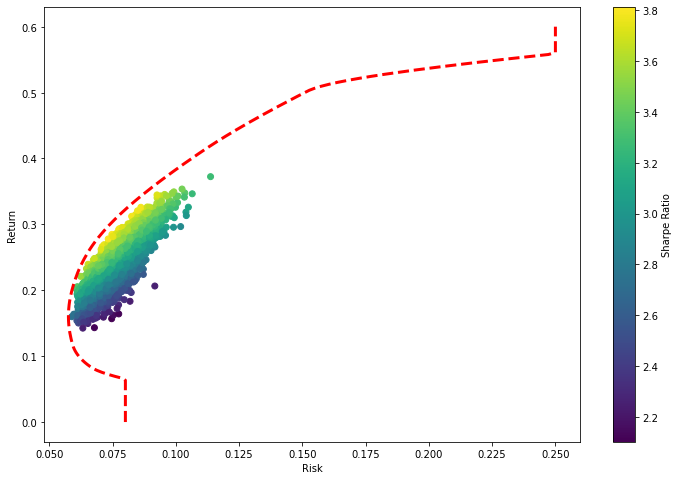

In [13]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Risk')
plt.ylabel('Return')
plt.plot(frontier_x,frontier_y, 'r--', linewidth=3)
plt.show()

As seen in the above plot, max return we can get is around 0.55 with a risk of about 0.25 and min return we can get is around 0.07 with a risk of about 0.080

### Use a risk-free asset along with the 10 risky assets to obtain CAP"M". Draw the straight line and show that it is tangent to the efficient frontier. Obtain the market portfolio.

Define risk free rate to be 1.5 %

In [14]:
num_portfolios = 10000
risk_free_rate = 0.015

In [15]:
def portfolio_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights ) * 62
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(62)
    return std, returns
  
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(10)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

In [16]:
# constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_var, p_ret = portfolio_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = minimize(neg_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

def portfolio_volatility(weights, mean_returns, cov_matrix):
    return portfolio_performance(weights, mean_returns, cov_matrix)[0]

def min_variance(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))

    result = minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

def efficient_return(mean_returns, cov_matrix, target):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

    def portfolio_return(weights):
        return portfolio_performance(weights, mean_returns, cov_matrix)[1]

    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for asset in range(num_assets))
    result = minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result

def efficient_frontier(mean_returns, cov_matrix, returns_range):
    efficients = []
    for ret in returns_range:
        efficients.append(efficient_return(mean_returns, cov_matrix, ret))
    return efficients

In [17]:
def print_stats(rp, sdp, max_sharpe_allocation, rp_min, sdp_min, min_vol_allocation, show_portfolio=False):
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Return over 3 month period:", round(rp,3))
    print ("Risk over 3 month period:", round(sdp,3))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Risk Portfolio Allocation\n")
    print ("Return over 3 month period:", round(rp_min,3))
    print ("Risk over 3 month period:", round(sdp_min,3))
    print ("\n")
    print (min_vol_allocation)

    if (show_portfolio == True):
        an_vol = np.std(returns) * np.sqrt(62)
        an_rt = mean_returns * 62
        print ("-"*80)
        print ("Individual Stock Returns and Risk\n")
        for i, txt in enumerate(df.columns):
            print (txt,":","return over 3 month period",round(an_rt[i],3),", risk over 3 month period:",round(an_vol[i],3))
        print ("-"*80)

In [18]:
def plot_stats(results, sdp, rp, sdp_min, rp_min, frontier_flag=True):
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum risk')
    
    if (frontier_flag == False):
        plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
        plt.xlabel('risk over 3 month period')
        plt.ylabel('returns over 3 month period')
        plt.legend(labelspacing=0.8)

        return

    target = np.linspace(rp_min, 0.40, 500)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    plt.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')

    plt.title('Calculated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('risk over 3 month period')
    plt.ylabel('returns over 3 month period')
    plt.legend(labelspacing=0.8)

In [19]:
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=df.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,3)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=df.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,3)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T

    print_stats(rp, sdp, max_sharpe_allocation, rp_min, sdp_min, min_vol_allocation)
    plot_stats(results, sdp, rp, sdp_min, rp_min, False)

Observed Max Sharpe Ratio Co-ordinate based on 10000 Random Portfolios

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Return over 3 month period: 0.289
Risk over 3 month period: 0.076


              AAPL     AMD   AMZN  GOOGL  META    MSFT   NFLX   NVDA   SONY  \
allocation  18.165  18.821  0.233  5.829  0.74  17.935  4.096  2.502  18.41   

              TSLA  
allocation  13.268  
--------------------------------------------------------------------------------
Minimum Risk Portfolio Allocation

Return over 3 month period: 0.178
Risk over 3 month period: 0.06


              AAPL    AMD    AMZN   GOOGL   META   MSFT   NFLX   NVDA    SONY  \
allocation  20.056  5.951  18.511  20.511  3.175  9.579  2.137  0.496  17.689   

             TSLA  
allocation  1.894  


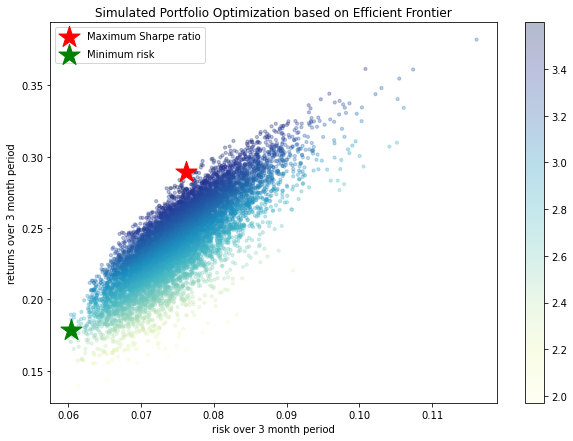

In [20]:
display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

In [21]:
def display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, _ = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=df.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,3)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=df.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,3)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print_stats(rp, sdp, max_sharpe_allocation, rp_min, sdp_min, min_vol_allocation)
    plot_stats(results, sdp, rp, sdp_min, rp_min, False)

Theoretical Max Sharpe Ratio Co-ordinates

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Return over 3 month period: 0.305
Risk over 3 month period: 0.075


              AAPL     AMD  AMZN  GOOGL  META  MSFT  NFLX   NVDA    SONY  \
allocation  37.561  15.913   0.0    0.0   0.0   0.0   1.6  1.551  29.947   

              TSLA  
allocation  13.429  
--------------------------------------------------------------------------------
Minimum Risk Portfolio Allocation

Return over 3 month period: 0.16
Risk over 3 month period: 0.058


             AAPL  AMD    AMZN   GOOGL   META    MSFT   NFLX  NVDA    SONY  \
allocation  13.19  0.0  15.193  16.591  5.081  17.051  0.198   0.0  29.598   

             TSLA  
allocation  3.099  


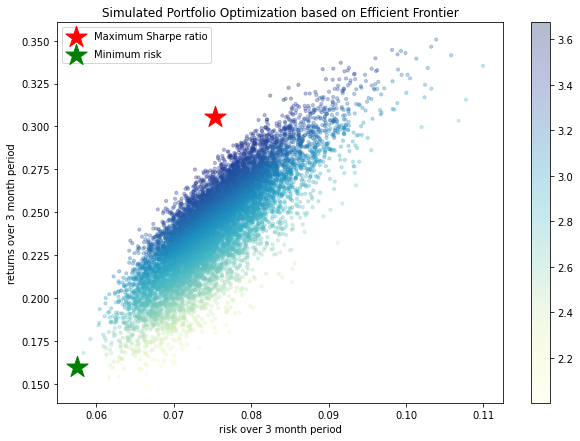

In [22]:
display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

In [23]:
def display_ef_with_tangent(mean_returns, cov_matrix, risk_free_rate):
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=df.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,3)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=df.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,3)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T

    print_stats(rp, sdp, max_sharpe_allocation, rp_min, sdp_min, min_vol_allocation, True)

    an_vol = np.std(returns) * np.sqrt(62)
    an_rt = mean_returns * 62

    fig, ax = plt.subplots(figsize=(10, 7))
    ax.scatter(an_vol, an_rt,marker='o',s=200)

    for i, txt in enumerate(df.columns):
        ax.annotate(txt, (an_vol[i],an_rt[i]), xytext=(10,0), textcoords='offset points')
    ax.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    ax.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum risk')

    target = np.linspace(rp_min, 0.60, 500)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    ax.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    
    ax.set_title('Portfolio Optimization with Individual Stocks')
    ax.set_xlabel('risk over 3 month period')
    ax.set_ylabel('returns over 3 month period')
    ax.legend(labelspacing=0.8)
    
    print(round(sdp,3), round(rp,3))
    print(0, risk_free_rate)

    plt.plot([0, round(sdp,4)], [risk_free_rate, round(rp,4)], 'k-', linewidth=2, label='Tangent to the efficient frontier')
    plt.legend()
    plt.show()

    an_vol = np.std(returns) * np.sqrt(62)
    an_rt = mean_returns * 62
    d = {}
    for i, txt in enumerate(df.columns):
        d[txt] = [round(an_rt[i],3), round(an_vol[i],3)]
    d['market'] = [round(rp,3), round(sdp,3)]
    return d

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Return over 3 month period: 0.305
Risk over 3 month period: 0.075


              AAPL     AMD  AMZN  GOOGL  META  MSFT  NFLX   NVDA    SONY  \
allocation  37.561  15.913   0.0    0.0   0.0   0.0   1.6  1.551  29.947   

              TSLA  
allocation  13.429  
--------------------------------------------------------------------------------
Minimum Risk Portfolio Allocation

Return over 3 month period: 0.16
Risk over 3 month period: 0.058


             AAPL  AMD    AMZN   GOOGL   META    MSFT   NFLX  NVDA    SONY  \
allocation  13.19  0.0  15.193  16.591  5.081  17.051  0.198   0.0  29.598   

             TSLA  
allocation  3.099  
--------------------------------------------------------------------------------
Individual Stock Returns and Risk

AAPL : return over 3 month period 0.265 , risk over 3 month period: 0.089
AMD : return over 3 month period 0.474 , ri

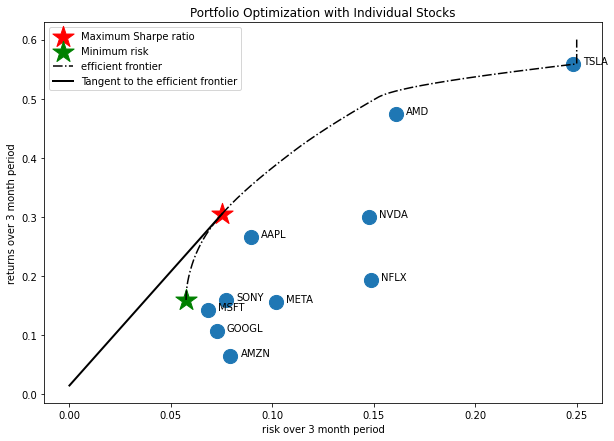

In [24]:
d = display_ef_with_tangent(mean_returns, cov_matrix, risk_free_rate)

### Use any three assets out of the 10 risky assets to get Security Market Line

In [25]:
d

{'AAPL': [0.265, 0.089],
 'AMD': [0.474, 0.161],
 'AMZN': [0.065, 0.079],
 'GOOGL': [0.108, 0.073],
 'META': [0.156, 0.102],
 'MSFT': [0.142, 0.069],
 'NFLX': [0.193, 0.149],
 'NVDA': [0.301, 0.148],
 'SONY': [0.159, 0.077],
 'TSLA': [0.559, 0.248],
 'market': [0.305, 0.075]}

AAPL : return over 3 month period 0.265 , risk over 3 month period: 0.089

AMD : return over 3 month period 0.474 , risk over 3 month period: 0.161

GOOGL : return over 3 month period 0.108 , risk over 3 month period: 0.073

In [26]:
# Define the expected returns and volatilities for the 10 assets and the market portfolio
asset1_er = d['AAPL'][0]
asset1_vol = d['AAPL'][1]

asset2_er = d['AMD'][0]
asset2_vol = d['AMD'][1]

asset3_er = d['GOOGL'][0]
asset3_vol = d['GOOGL'][1]

market_er = d['market'][0]
market_vol = d['market'][1]

In [27]:
# Define the risk-free rate
rf = 0.015

# Calculate the market risk premium
mrp = market_er - rf

In [28]:
# Calculate the beta of each asset
asset1_beta = (asset1_er - rf) / (market_er - rf)
asset2_beta = (asset2_er - rf) / (market_er - rf)
asset3_beta = (asset3_er - rf) / (market_er - rf)

In [29]:
# Print the betas of each asset
print(f"Beta of Asset 1: {asset1_beta:.2f}")
print(f"Beta of Asset 2: {asset2_beta:.2f}")
print(f"Beta of Asset 3: {asset3_beta:.2f}")

Beta of Asset 1: 0.86
Beta of Asset 2: 1.58
Beta of Asset 3: 0.32


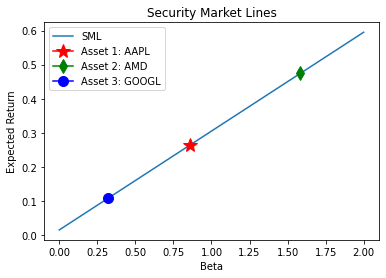

In [30]:
# Define a range of betas to plot the Security Market Lines
betas = np.linspace(0, 2, 100)

# Calculate the expected returns for each asset at different levels of beta
asset1_ers = rf + asset1_beta * (market_er - rf) 
asset2_ers = rf + asset2_beta * (market_er - rf) 
asset3_ers = rf + asset3_beta * (market_er - rf) 

sml = rf + betas * (market_er - rf) 

# Plot the Security Market Lines
plt.plot(betas, sml, label='SML')
plt.plot(asset1_beta, asset1_ers, color='red', marker='*', label='Asset 1: AAPL', markersize=15)
plt.plot(asset2_beta, asset2_ers, color='green', marker='d', label='Asset 2: AMD', markersize=10)
plt.plot(asset3_beta, asset3_ers, color='blue', marker='o', label='Asset 3: GOOGL', markersize=10)

# Add labels and title to the plot
plt.xlabel('Beta')
plt.ylabel('Expected Return')
plt.title('Security Market Lines')

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()

In [31]:
# # Calculate the beta of each asset using the CAPM formula
# asset1_beta = (asset1_er - rf) / (market_er - rf) * (asset1_vol / market_vol)
# asset2_beta = (asset2_er - rf) / (market_er - rf) * (asset2_vol / market_vol)
# asset3_beta = (asset3_er - rf) / (market_er - rf) * (asset3_vol / market_vol)